In [1]:
# Import necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

# Importing modules for data preprocessing and model evaluation
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Importing regression models for comparison
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor


import missingno as msno

# Suppressing unnecessary warnings 

pd.set_option('display.max_columns', 50)
warnings.filterwarnings('ignore')

In [117]:
# Load the dataset from a csv file into a Pandas DataFrame

data = pd.read_csv('car_data.csv')

In [118]:
# Create a copy of the original DataFrame for manipulation and analysis

df = data.copy()

In [119]:
# Display concise information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [72]:
# Check and display the sum of missing values in each column

df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [120]:
# Display the first few rows of the DataFrame to get a quick overview

df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded,335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded,230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded,230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### **Exploratory Data Analysis (EDA)**

*Conducting exploratory data analysis to extract compelling insights from the dataset. Presented below are code cells along with their plots that provide valuable perspectives on the data*

In [121]:
# Extract & Display the top ten car brands based on their occurrence 

top_ten_brands = df['Make'].value_counts().reset_index().sort_values(by='count', ascending=False).head(10)

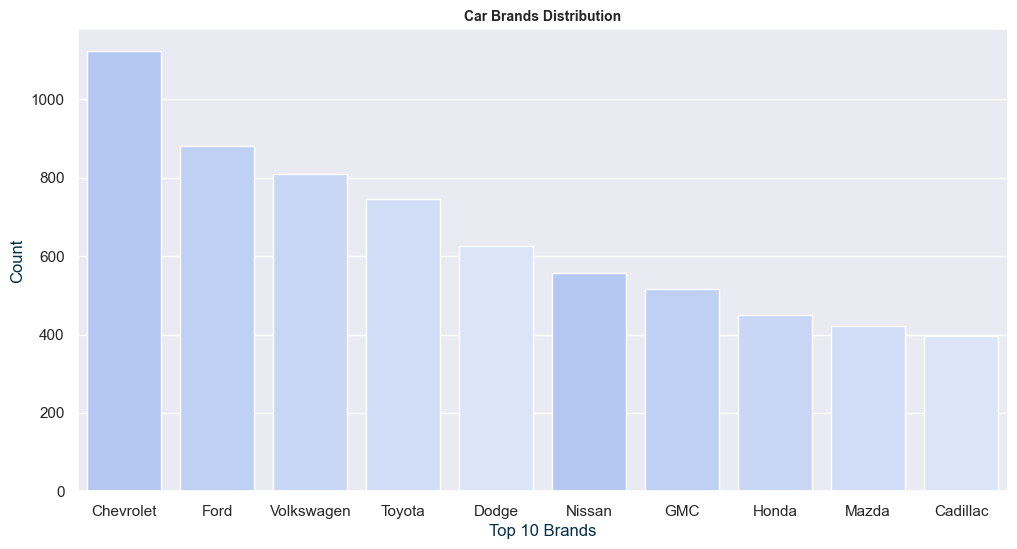

In [125]:
# Create a bar plot to visualize the count of car brands in the top 10

color_list = ["#abc4ff", "#b6ccfe", "#c1d3fe", "#ccdbfd", "#d7e3fc", "#abc4ff", "#b6ccfe", "#c1d3fe", "#ccdbfd", "#d7e3fc"]

plt.figure(figsize=(12, 6))
sns.set(style='darkgrid')
sns.barplot(x='Make', y='count', data=top_ten_brands, palette=color_list)

plt.title('Car Brands Distribution', fontdict={'weight': 'bold', 'fontsize': 10})
plt.xlabel('Top 10 Brands', fontdict={'color': '#023047'})
plt.ylabel('Count', fontdict={'color': '#023047'})

# Set the plot style and display the plot
# plt.grid(True)
plt.show()

*Examining the plot reveals that Chevrolet manufacturer has the most significant number of cars, while brands like Bugatti and Genesis typically have fewer cars. Additionally, various other car brands and their respective car counts are also included in our analysis.*

In [126]:
# Extract and display the top ten car production years based on their occurrence in the 'Year' column

count_cars_year = df['Year'].value_counts().reset_index().sort_values(by='count', ascending=False).head(10)


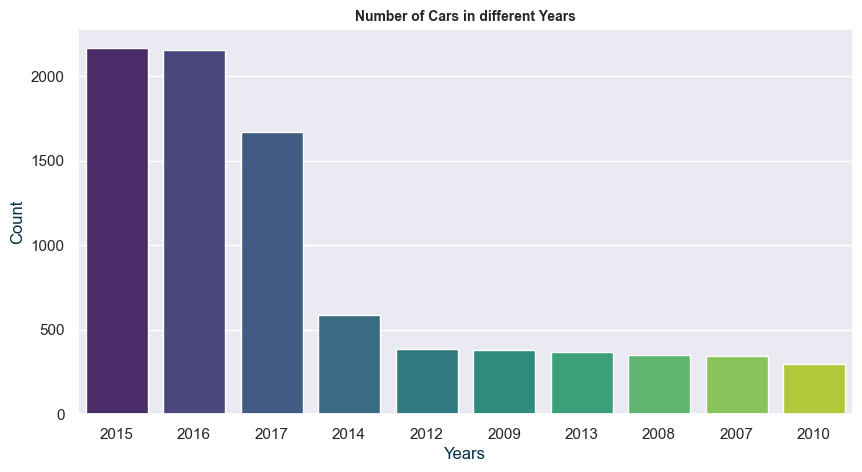

In [82]:
# Create a bar plot to visualize the number of cars in different years

plt.figure(figsize=(10, 5))
sns.barplot(x='Year', y='count', data=count_cars_year, palette='viridis', order=count_cars_year['Year'].unique())

plt.title('Number of Cars in different Years', fontdict={'weight': 'bold', 'fontsize': 10})
plt.xlabel('Years', fontdict={'color': '#023047'})
plt.ylabel('Count', fontdict={'color': '#023047'})
plt.show()

*The plot illustrates that our dataset primarily includes recent cars, with fewer instances of significantly older models.This is advantageous because our data predominantly reflects the latest car prices, providing more relevant insights without relying heavily on outdated information*

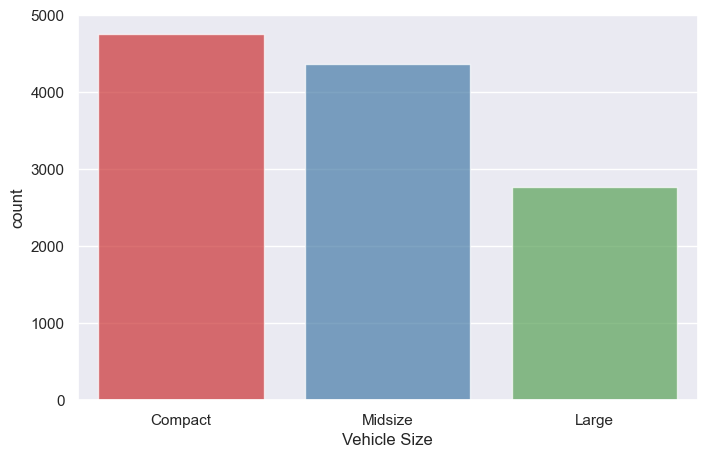

In [83]:
# Create a count plot to visualize the distribution of vehicle sizes

plt.figure(figsize=(8, 5))
sns.countplot(x='Vehicle Size', data=df, palette='Set1', alpha=0.7)

plt.show()

*The observation reveals a higher prevalence of compact cars compared to categories such as midsize and large segments. this mirrors the real-world scenario where a majority of cars fall into the compact or midsize categoris, while a fewer number are classified as large. Consequently, the dataset closely aligns with real-world distribution, enhancing the potential for accurate predictions on the test set*

<Axes: >

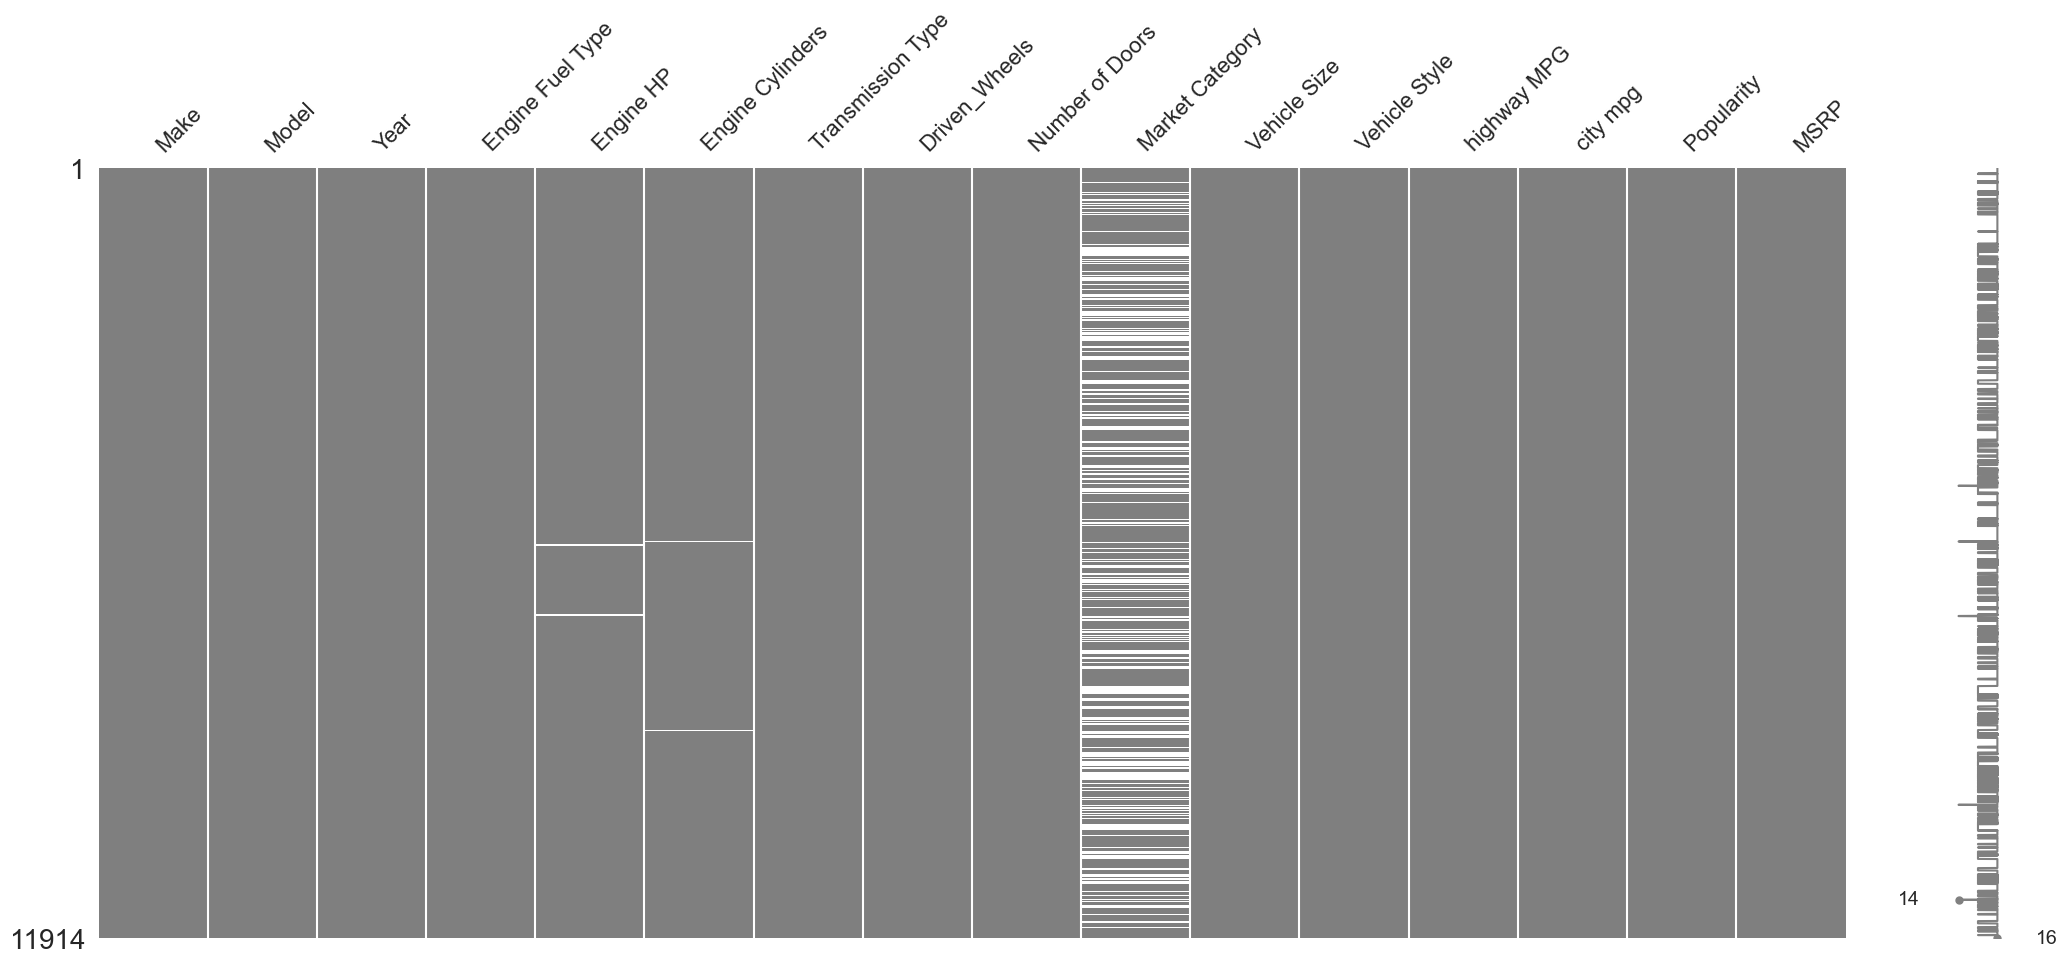

In [84]:
# Create a matrix plot to visualize the pattern of missing values in the DataFrame

msno.matrix(df, color=(0.5, 0.5, 0.5))

*Missingno is a useful machine learning plotting library used for understanding the total number of missing values in the datase. We see that ‘Market Category’ feature has a lot of missing values as denoted by the white strips. Apart from this, we also see that there are some missing values in Engine HP and Engine Cylinders that must be taken into consideration when we are giving the data to the machine learning models.*

In [85]:
# Calculate the average MSRP (Manufacturer's Suggested Retail Price) for each year and round the values

avg_price_df = df.groupby('Year')['MSRP'].mean().reset_index()
avg_price_df['MSRP'] = avg_price_df['MSRP'].round(2)

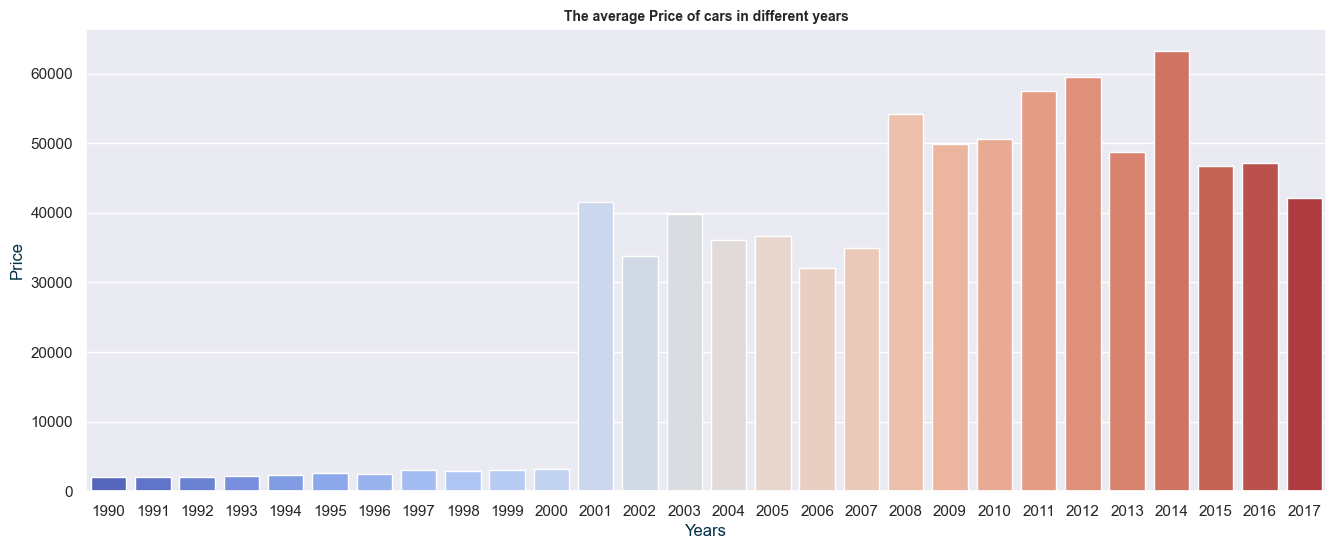

In [86]:
# Create a bar plot to visualize the average price of cars in different years

plt.figure(figsize=(16, 6))
sns.barplot(x='Year', y='MSRP', data=avg_price_df, palette='coolwarm')

plt.title('The average Price of cars in different years', fontdict={'weight': 'bold', 'fontsize': 10})
plt.xlabel('Years', fontdict={'color': '#023047'})
plt.ylabel('Price', fontdict={'color': '#023047'})
plt.show()

*Aggregating the data by the manufacturing years allows for a detailed analysis of specific attributes and features. In this instance, we grouped the cars by their respective years of manufacture and computed the average prices within each group. Our findings indicate a consistent upward trend in the average prices of cars as the years advance.*

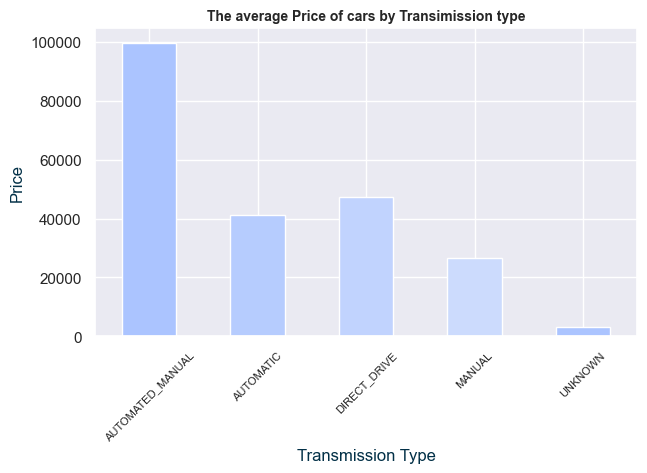

In [87]:
# Create a bar plot to visualize the average price of cars by transmission type

plt.figure(figsize=(7, 4))
df.groupby('Transmission Type')['MSRP'].mean().plot(kind='bar', color=["#abc4ff", "#b6ccfe", "#c1d3fe", "#ccdbfd"])

plt.title('The average Price of cars by Transimission type', fontdict={'weight': 'bold', 'fontsize': 10})
plt.xlabel('Transmission Type', fontdict={'color': '#023047'})
plt.ylabel('Price', fontdict={'color': '#023047'})
plt.xticks(rotation=45, fontsize=8)

plt.show()

*Cars equipped with both automatic and manual transmissions exhibit notably higher prices compared to other cars. This observation aligns with the general understanding that manual cars typically have lower costs compared to their automatic counterparts.*

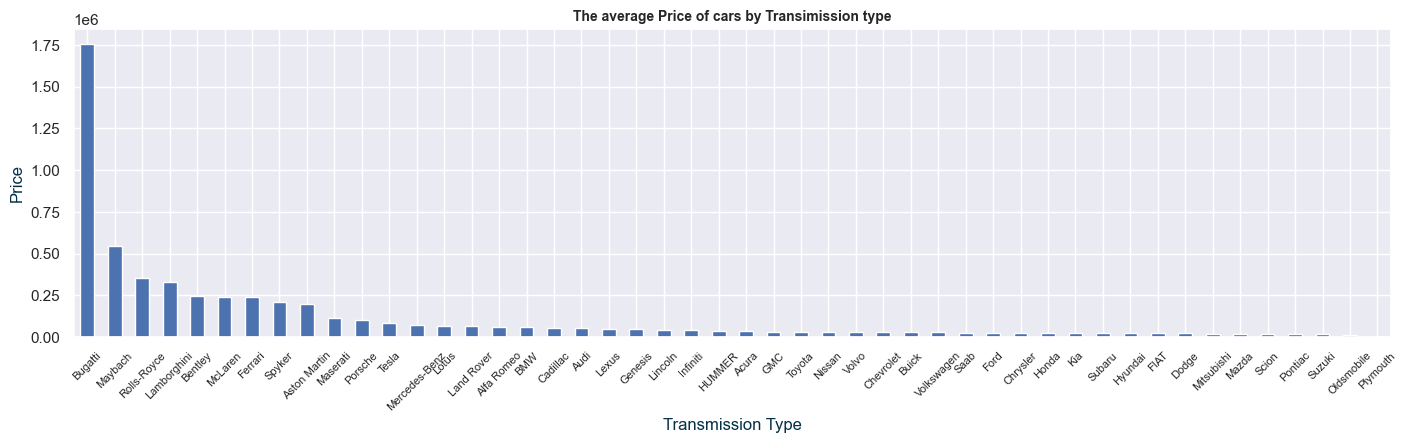

In [88]:
# Create a bar plot to visualize the average price of cars by make in descending order

plt.figure(figsize=(17, 4))
df.groupby('Make')['MSRP'].mean().sort_values(ascending=False).plot(kind='bar')

plt.title('The average Price of cars by Transimission type', fontdict={'weight': 'bold', 'fontsize': 10})
plt.xlabel('Transmission Type', fontdict={'color': '#023047'})
plt.ylabel('Price', fontdict={'color': '#023047'})
plt.xticks(rotation=45, fontsize=8)

plt.show()

*The visualization presents a compelling insight- Bugatti, as a manufacturer, stands out with substantially higher prices compared to the combined prices of other manufacturers. Additionally, several other companies, such as Mybach, Rolls-Royce, and Lamborghini, closely approach the price ranges of cars, offereing valuable insights into the distribution of prices amoung differnt manufactureres.*

#### **Grouping on the basis of Driven Wheels**

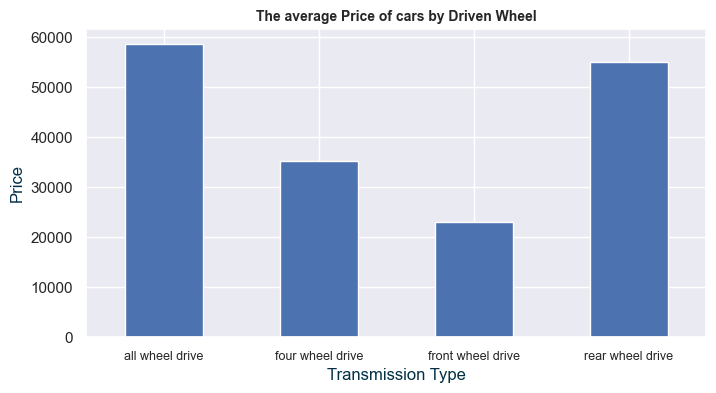

In [89]:
# Create a bar plot to visualize the average price of cars by driven wheel type

plt.figure(figsize=(8, 4))
df.groupby('Driven_Wheels')['MSRP'].mean().plot(kind='bar')

plt.title('The average Price of cars by Driven Wheel', fontdict={'weight': 'bold', 'fontsize': 10})
plt.xlabel('Transmission Type', fontdict={'color': '#023047'})
plt.ylabel('Price', fontdict={'color': '#023047'})
plt.xticks(rotation=0, fontsize=9)
plt.show()

*The data is now segmented based on the type of driven wheels, and the average prices for each group are calculated. As anticipated, the average price of "all wheel drive" cars emerges as the highest, followed by "rear wheel drive" cars. This aligns with expectations, as "all wheel drive" cars typically possess greater power and come with higher costs. Conversely, "Front wheel drive" cars, known for their less powerful performance, exhibit lower average prices*

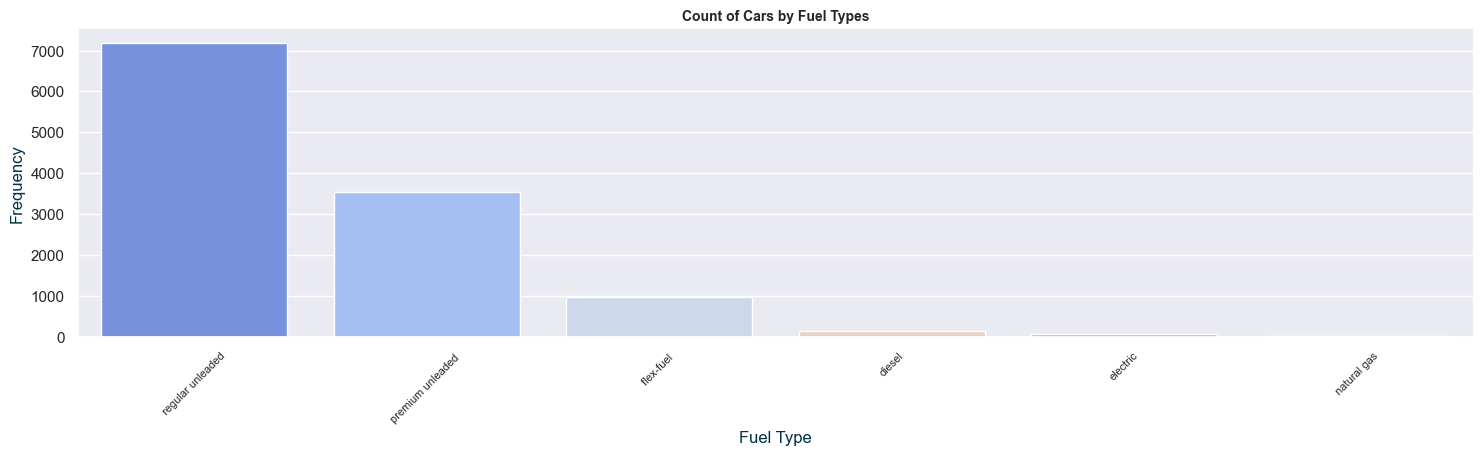

In [90]:
# Create a bar plot to visualize the count of cars by engine fuel type

plt.figure(figsize=(18,4))
sns.barplot(x=df['Engine Fuel Type'].value_counts().index, y=df['Engine Fuel Type'].value_counts().values, palette='coolwarm')

plt.title('Count of Cars by Fuel Types', fontdict={'weight': 'bold', 'fontsize': 10})
plt.xlabel('Fuel Type', fontdict={'color': '#023047'})
plt.ylabel('Frequency', fontdict={'color': '#023047'})
plt.xticks(rotation=45, fontsize=8)
sns.despine()
plt.show()

##### **Grouping on the basis of Make with 'Popularity' values**

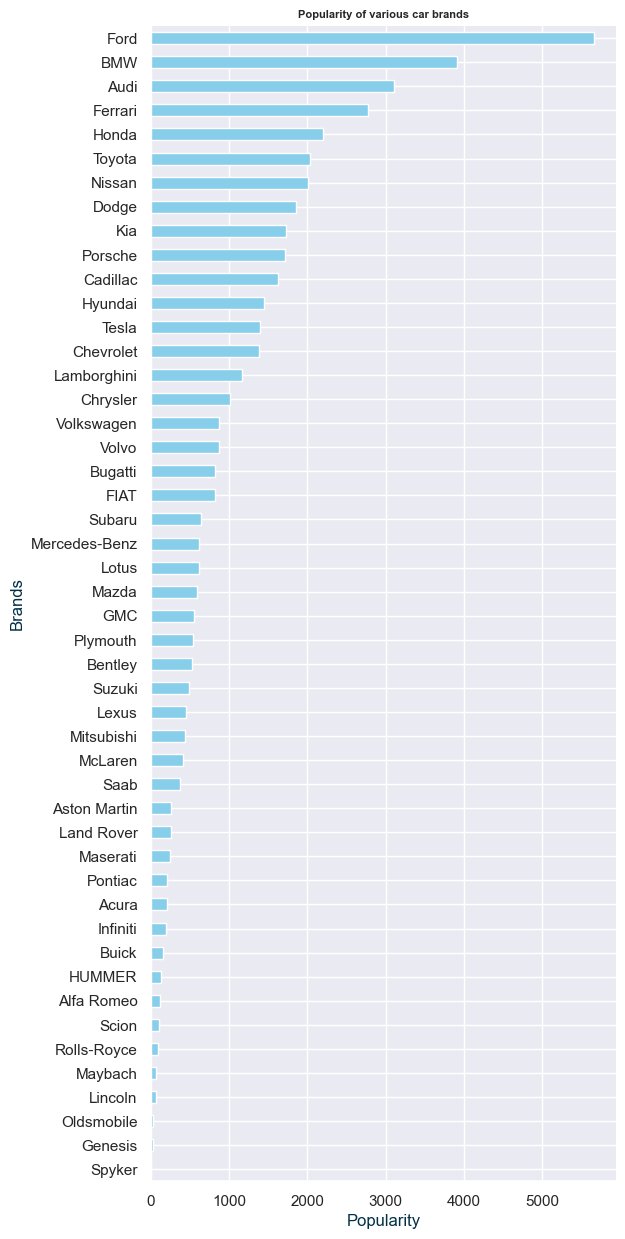

In [91]:
# Create a horizontal bar plot to visualize the popularity of various car brands

plt.figure(figsize=(6,15))
df.groupby('Make')['Popularity'].mean().sort_values(ascending=True).plot(kind='barh', color='skyblue')

plt.title('Popularity of various car brands', fontdict={'weight': 'bold', 'fontsize': 8})
plt.xlabel('Popularity', fontdict={'color': '#023047'})
plt.ylabel('Brands', fontdict={'color': '#023047'})

sns.despine()
plt.show()

*The dataset is grouped based on the make/Manufacturer of cars, and the average popularity for each car is determined. Notably, 'Ford' emerges as the most popular brand across the dataset, followed by 'BMW' and 'Audi'. Conversely, brands like 'Lincoln' and 'Genesis' demonstrate lower popularity levels. The plot also highlights the prominence of 'Toyota' as another well-received brand within the dataset.*

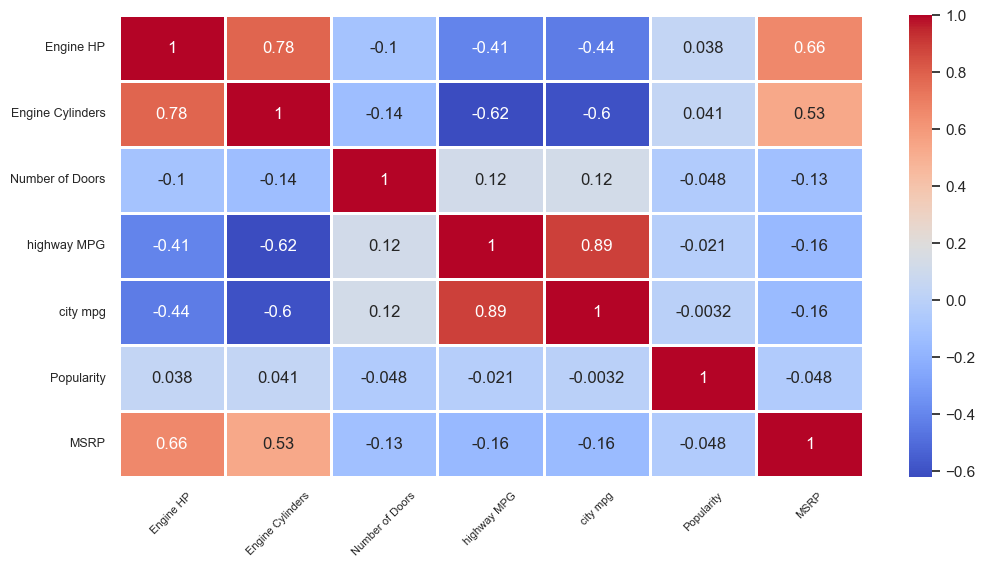

In [92]:
# Create a heatmap to visualize the correlation between numeric columns in the DataFrame

plt.figure(figsize=(12, 6))
num_cols = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']
heatmap_df = df[num_cols].corr()

sns.heatmap(heatmap_df, cmap='coolwarm', annot=True, linewidths=1)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=9)
plt.show()

*A Seaborn heatmap proves invaluable for visualizing correlations between various features in our dataset. The choice of palette influences the color representation, providing a clear visual estimation of values. In our correlation plot:*

* 'City MPG' and 'Highway MPG' exhibit a strong positive correlation, reflected by a correlation coefficient of 0.89.

* Similarly, 'Engine Cylinders' and 'Engine HP' demonstrate a positive correlation

*The remaining features appear either negatively correlated or uncorrelated. It's essential to note that correlation coefficients range from -1 to 1, where a higher positive correlation moves the coefficient closer to 1, and a higher negative correlation shifts it toward -1. This insight aids in understanding the relationships between different features in our dataset.*

### **Scatterplot between 'highway MPG' and 'city mpg'**

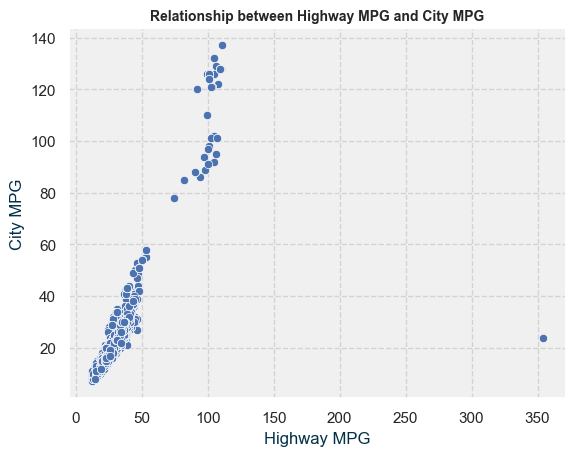

In [93]:
# Create a scatter plot to visualize the relationship between Highway MPG and City MPG

sns.scatterplot(x='highway MPG', y='city mpg', data=df)

plt.title('Relationship between Highway MPG and City MPG', fontdict={'weight': 'bold', 'fontsize': 10})
plt.xlabel('Highway MPG', fontdict={'color': '#023047'})
plt.ylabel('City MPG', fontdict={'color': '#023047'})
plt.grid(True, color='lightgrey', linestyle='--', linewidth=1)
plt.gca().set_facecolor('#f0f0f0')
sns.despine()
plt.show()

*Anticipating a linear relationship between 'highway MPG' and 'city MPG' due to their strong correlation, the plot reveals a generally expected pattern. However, an outlier is evident where the highway MPG is unusually high, around 350. Such extreme values are not representative of typical car data, and it is advisable to remove this outlier. Addressing outliers is crucial in ensuring the accuracy of machine learning operations, as they can significantly impact results and introduce errors into the analysis. Removing outliers helps maintain the integrity of the dataset and enhances the reliability of subsequent analyses.*

In [64]:
# We would be removing the outlier in our data where the highway  MPG > 350

df[df['highway MPG'] > 350]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1119,Audi,A6,2017,premium unleaded,252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600


In [65]:
df = df[df['highway MPG'] < 350]

*By employing a scatterplot after removing outliers, we observe a representation of the expected linear relationship between 'highway MPG' and 'city MPG.'*

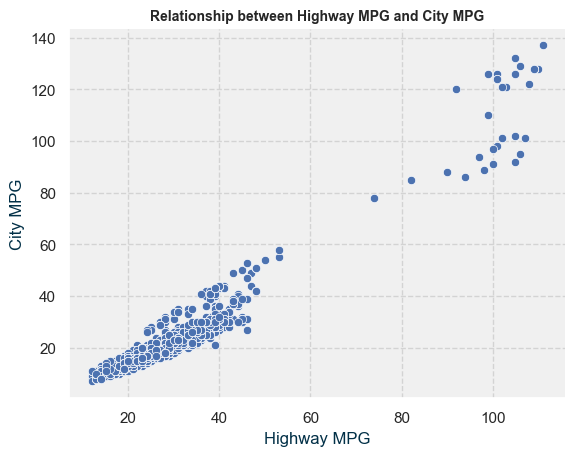

In [96]:
# Create a scatter plot to visualize the relationship between Highway MPG and City MPG - After outliers removed

sns.scatterplot(x='highway MPG', y='city mpg', data=df)

plt.title('Relationship between Highway MPG and City MPG', fontdict={'weight': 'bold', 'fontsize': 10})
plt.xlabel('Highway MPG', fontdict={'color': '#023047'})
plt.ylabel('City MPG', fontdict={'color': '#023047'})
plt.grid(True, color='lightgrey', linestyle='--', linewidth=1)
plt.gca().set_facecolor('#f0f0f0')
sns.despine()
plt.show()



In [97]:
# We would check all the unique values in 'Market Category'. We see that there are so many different unique values.

df['Market Category'].nunique()


71

#### **Boxplots**

*Boxplots serve as effective tools for gaining insights into the distribution of data values across various features. They provide information on key percentiles such as the 25th, 50th (median), and 75th percentiles, offering a comprehensive view of the data's spread. Additionally, boxplots assist in identifying outliers by utilizing a formula based on the interquartile range (IQR), which represents the difference between the 75th and 25th percentiles. This approach enables the detection of values that fall outside the typical range, contributing to a more thorough understanding of the dataset's distribution characteristics.*

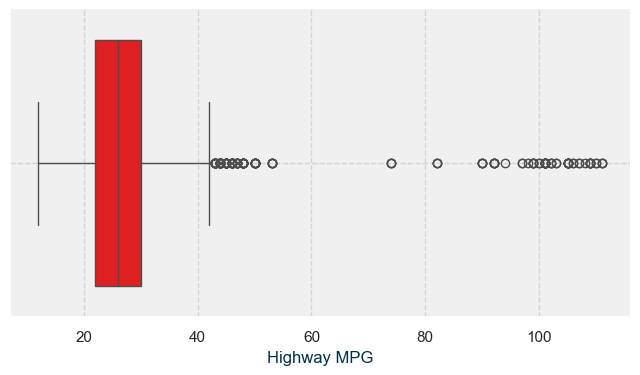

In [98]:
# Create a box plot to visualize the distribution of Highway MPG

plt.figure(figsize=(8, 4))
sns.boxplot(x='highway MPG', data=df, color='red')

plt.xlabel('Highway MPG', fontdict={'color': '#023047'})
plt.grid(True, color='lightgrey', linestyle='--', linewidth=1)
plt.gca().set_facecolor('#f0f0f0')
sns.despine()
plt.show()

*We would now be using the boxplot of hightway MPG and calculate the average values and how the distribution is spread. we see that the average values are about 25 for highway MPG and we see the maximum value being equal to about 40 and the points above that to be outliers.we see that the data is not spread as most of the values lie between 21 and 30 respectively*

### **Calculating percentiles of highway MPG**

*In order to provide more granularity and identify outliers with greater precision, we can print percentile values for 'highway MPG' in a more detailed format. By doing so, we can gain a clearer understanding of the distribution and pinpoint the specific values considered as outliers.*

In [66]:
# Calculate median, Q1, Q3, and IQR for the 'highway MPG' column

median = np.median(df['highway MPG'])
Q1 = np.percentile(df['highway MPG'], 25)
Q3 = np.percentile(df['highway MPG'], 75)
IQR = Q3 - Q1 

# Define Lower and Upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

# Print the calculated values
print(f'Median: {median}')
print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')


Median: 26.0
Q1: 22.0
Q3: 30.0
IQR: 8.0
Lower Bound: 10.0
Upper Bound: 42.0


In [67]:
# Maximum and Minimum Highway MPG

max_highway_mpg = df['highway MPG'].max()
min_highway_mpg = df['highway MPG'].min()

print(f'Maximum Highway MPG: {max_highway_mpg}')
print(f'Minimum Highway MPG: {min_highway_mpg}\n')


Maximum Highway MPG: 111
Minimum Highway MPG: 12



In [68]:
# print the total number of rows where 'highway MPG' is greater than 60.

no_of_outliers_highway = df[df['highway MPG'] >= 60].shape[0]

print('Total Outliers in Highway MPG: ', no_of_outliers_highway)

Total Outliers in Highway MPG:  66


In [69]:
# Filtering the DataFrame: Keep only the rows within the specified bounds

nw_df = df[(df['highway MPG'] >= lower_bound) & (df['highway MPG'] <= upper_bound + 18)]


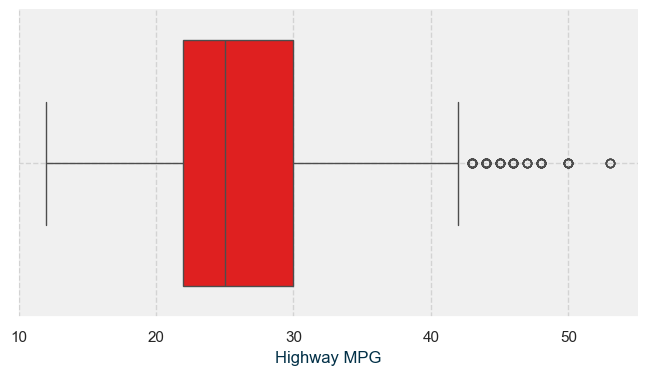

In [103]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='highway MPG', data=nw_df, color='red')

plt.xlabel('Highway MPG', fontdict={'color': '#023047'})
plt.grid(True, color='lightgrey', linestyle='--', linewidth=1)
plt.gca().set_facecolor('#f0f0f0')
sns.despine()
plt.show()

*We will conduct a similar detailed analysis for 'city mpg' to understand its distribution and identify any potential outliers. Once outliers are identified, removing those values will contribute to more reliable predictions. Deleting outliers is a common practice in data preprocessing to enhance the accuracy and validity of subsequent analyses, such as predictive modeling.*

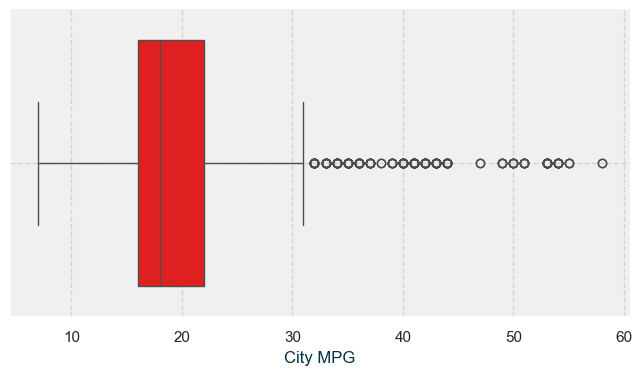

In [104]:
# Create a box plot to visualize the distribution of 'city mpg' in a new DataFrame (nw_df)

plt.figure(figsize=(8, 4))
sns.boxplot(x='city mpg', data=nw_df, color='red')

plt.xlabel('City MPG', fontdict={'color': '#023047'})
plt.grid(True, color='lightgrey', linestyle='--', linewidth=1)
plt.gca().set_facecolor('#f0f0f0')
sns.despine()
plt.show()

In [70]:
# Calculate median, Q1, Q3, and IQR for the 'City MPG' column

median = np.median(nw_df['city mpg'])
Q1 = np.percentile(nw_df['city mpg'], 25)
Q3 = np.percentile(nw_df['city mpg'], 75)
IQR = Q3 - Q1 

# Define Lower and Upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

# Print the calculated values
print(f'Median: {median}')
print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')


Median: 18.0
Q1: 16.0
Q3: 22.0
IQR: 6.0
Lower Bound: 7.0
Upper Bound: 31.0


In [71]:
max_city_mpg = nw_df['city mpg'].max()
min_city_mpg = nw_df['city mpg'].min()

print(f'Maximum City MPG: {max_city_mpg}')
print(f'Minimum City MPG: {min_city_mpg}')

Maximum City MPG: 58
Minimum City MPG: 7


In [72]:
# print the total number of rows where 'highway MPG' is greater than 60.

no_of_outliers_city = nw_df[nw_df['city mpg'] > 40].shape[0]

print('Total Outliers in city MPG: ', no_of_outliers_city)

Total Outliers in city MPG:  123


In [73]:
# Filtering the DataFrame: Keep only the rows within the specified bounds

nw_df = nw_df[(nw_df['city mpg'] >= lower_bound) & (nw_df['city mpg'] < upper_bound + 9)]


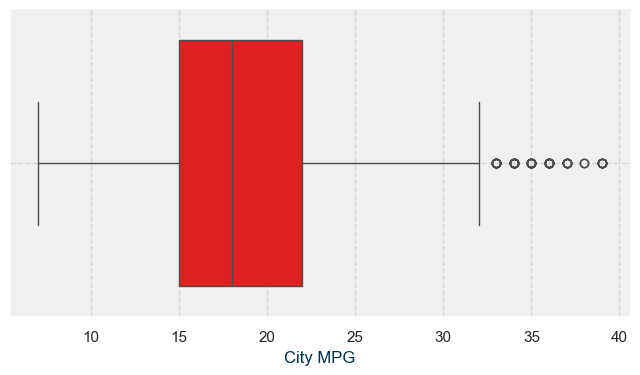

In [110]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='city mpg', data=nw_df, color='red')

plt.xlabel('City MPG', fontdict={'color': '#023047'})
plt.grid(True, color='lightgrey', linestyle='--', linewidth=1)
plt.gca().set_facecolor('#f0f0f0')
sns.despine()
plt.show()

*We would be looking at the 2 features 'city mpg' and 'highway MPG' respectively. We see that in terms of 'city mpg' most of the values that are present are in the range between 15 to 22 respectively. On the other hand, we find that most of the values that are present in 'highway MPG' are in the range 22 to 30 respectively. Therefore, we can see how the values are spread in the boxplot and see there the spread actually take place by comparing the features.*

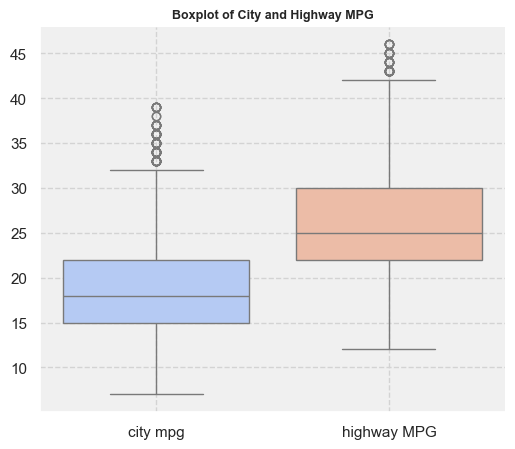

In [111]:
# Create a box plot to visualize the distribution of 'city mpg' and 'highway MPG' 

plt.figure(figsize=(6, 5))
sns.boxplot(data=nw_df[['city mpg', 'highway MPG']], palette='coolwarm')

plt.title('Boxplot of City and Highway MPG', fontdict={'weight': 'bold', 'fontsize': 9})
plt.grid(True, color='lightgrey', linestyle='--', linewidth=1)
plt.gca().set_facecolor('#f0f0f0')
sns.despine()
plt.show()

#### **Boxplot of Engine HP**

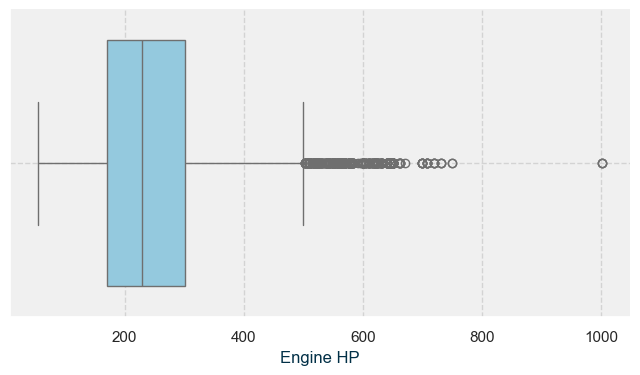

In [112]:
# Create a box plot to visualize the distribution of 'Engine HP' 

plt.figure(figsize=(8, 4))
sns.boxplot(x='Engine HP', data=nw_df, color='skyblue')

plt.xlabel('Engine HP', fontdict={'color': '#023047'})
plt.grid(True, color='lightgrey', linestyle='--', linewidth=1)
plt.gca().set_facecolor('#f0f0f0')
sns.despine()
plt.show()

*The majority of 'Engine HP' values are concentrated in the range of 150 to 300. While the maximum horsepower reaches around 500, values beyond this range are considered outliers. The boxplot suggests a right-skewed distribution, indicating that there are more instances of 'Engine HP' with values higher than the mean of approximately 250. This skewness suggests that a significant portion of the dataset consists of higher horsepower values, contributing to the rightward shift in the distribution.*

In [74]:
# print the total number of rows where 'highway MPG' is greater than 60.

no_of_outliers_EngineHP = nw_df[nw_df['Engine HP'] > 700].shape[0]

print('Total Outliers in city MPG: ', no_of_outliers_EngineHP)

# Filtering the DataFrame: Keep only the rows within the specified bounds

nw_df = nw_df[nw_df['Engine HP'] < 700]

Total Outliers in city MPG:  18


#### **lmplot between Engine HP and Popularity**

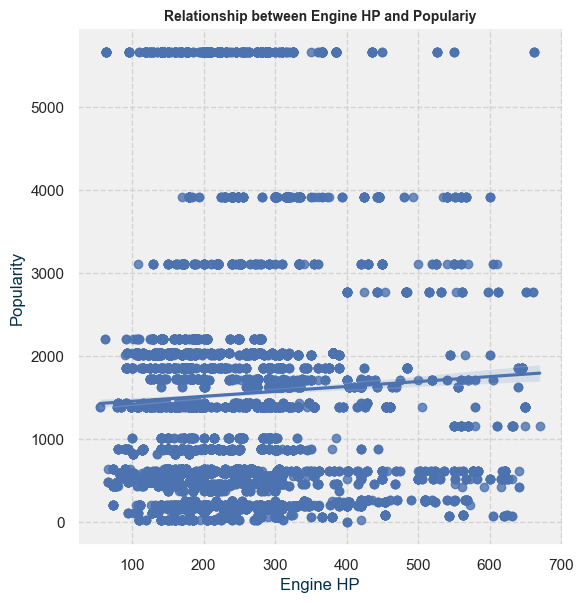

In [114]:
# Create a scatter plot with a linear regression line to visualize the relationship between 'Engine HP' and 'Popularity' 

sns.lmplot(x='Engine HP', y='Popularity', data=nw_df, height=6)

plt.title('Relationship between Engine HP and Populariy', fontdict={'weight': 'bold', 'fontsize': 10})
plt.xlabel('Engine HP', fontdict={'color': '#023047'})
plt.ylabel('Popularity', fontdict={'color': '#023047'})
plt.grid(True, color='lightgrey', linestyle='--', linewidth=1)
plt.gca().set_facecolor('#f0f0f0')
sns.despine()
plt.show()


*Using an lmplot to examine the relationship between 'Engine HP' and 'Popularity,' we observe that most of the data points do not appear strongly related. However, a notable feature is the presence of a linear line with a positive slope. This suggests that, on average, an increase in 'Engine HP' corresponds to a higher likelihood of an increase in 'Popularity.' It's crucial to note that correlation does not imply causation, and while a correlation may be observed, it doesn't necessarily indicate a direct cause-and-effect relationship between the two variables in all cases.*

#### **lmplot between Engine Cylinders and Engine HP**

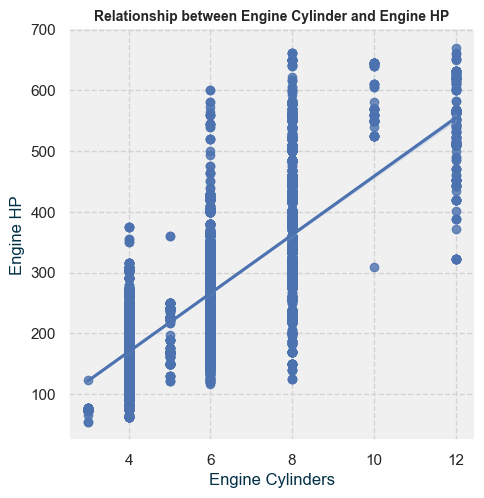

In [115]:
# Create a scatter plot with a linear regression line to visualize the relationship between Engine Cylinder and Engine HP 

sns.lmplot(x='Engine Cylinders', y='Engine HP', data=nw_df, height=5)

plt.title('Relationship between Engine Cylinder and Engine HP', fontdict={'weight': 'bold', 'fontsize': 10})
plt.xlabel('Engine Cylinders', fontdict={'color': '#023047'})
plt.ylabel('Engine HP', fontdict={'color': '#023047'})
plt.grid(True, color='lightgrey', linestyle='--', linewidth=1)
plt.gca().set_facecolor('#f0f0f0')
sns.despine()
plt.show()

*The lmplot clearly illustrates a strong correlation between 'Engine Cylinders' and 'Engine HP,' as evidenced by the nearly perfect linear relationship depicted in the plot. The use of lmplot is effective in visually assessing the linear correlation between these two features. The tightly drawn line suggests a consistent relationship, reinforcing the idea that changes in the number of engine cylinders are closely associated with corresponding changes in engine horsepower.*

#### **lmplot between City MPG and Highway MPG**

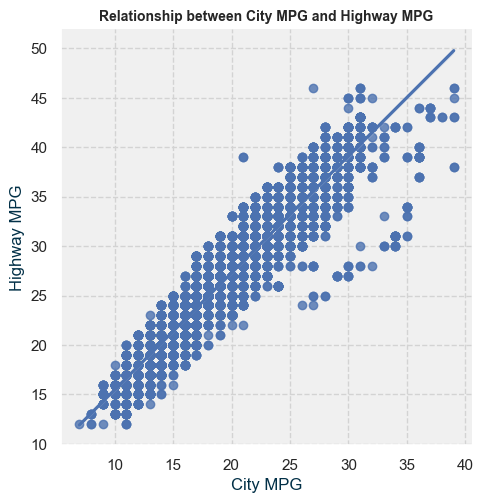

In [116]:
# Create a scatter plot with a linear regression line to visualize the relationship between City MPG and Highway MPG

sns.lmplot(x='city mpg', y='highway MPG', data=nw_df, height=5)

plt.title('Relationship between City MPG and Highway MPG', fontdict={'weight': 'bold', 'fontsize': 10})
plt.xlabel('City MPG', fontdict={'color': '#023047'})
plt.ylabel('Highway MPG', fontdict={'color': '#023047'})
plt.grid(True, color='lightgrey', linestyle='--', linewidth=1)
plt.gca().set_facecolor('#f0f0f0')
sns.despine()
plt.show()

*The observed linear relationships among the 'City MPG' and 'Highway MPG' features in our dataset mirror real-world scenarios. This alignment reinforces the authenticity of our dataset, as the features closely resemble those encountered in actual situations.*

#### **Checking the NULL values**

*Checking for null values is a crucial step in data preprocessing. It's noted that several features, such as 'Engine Fuel Type' and 'Engine HP,' contain missing values. Since machine learning models generally cannot handle missing values, addressing this issue becomes essential. Various methods, such as imputation or filling missing values, need to be employed to ensure a complete and usable dataset for training machine learning models.*

In [117]:
nw_df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP               0
Engine Cylinders       20
Transmission Type       0
Driven_Wheels           0
Number of Doors         1
Market Category      3731
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [81]:
# We would be calculating the median values of 'Number of doors' so that we can fill the missing values with the median value.

nw_df['Number of Doors'].median()

4.0

In [82]:
nw_df['Number of Doors'].fillna(4.0, inplace=True)

#### **Feature Extraction**

*This involves creating a new column named 'Present Year' and assigning it the current year. Subsequently, the 'Year of Manufacture' values are subtracted from the 'Present Year' to calculate the total number of years each car has been in use. This additional feature, denoting the age of the cars, can be valuable for modeling purposes, especially when predicting car prices or assessing their depreciation over time.*

In [91]:
from datetime import datetime

# Get the current date
cur_date = pd.Timestamp(datetime.today())

# Create a new column 'Present Year' and assign the current year
nw_df['Present Year'] = cur_date.year

In [92]:
# Calculate the 'Years since Manufacture' by subtracting the 'Year' column from the 'Present Year' column

nw_df['Years since Manufacture'] = nw_df['Present Year'] - nw_df['Year']

# Drop the 'Present Year' column from the DataFrame (nw_df)
nw_df.drop(columns=['Present Year'], inplace=True)

In [93]:
nw_df.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Years since Manufacture
0,BMW,1 Series M,2011,premium unleaded,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,13
1,BMW,1 Series,2011,premium unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,13
2,BMW,1 Series,2011,premium unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,13


*Observing that the majority of cars in the dataset are around 8 to 9 years old, it is evident that the dataset predominantly consists of relatively young cars. Although there are a few cars with an age of around 34 years, their occurrence is limited. Focusing on more recent data points is advantageous, as it aligns with the current trend and provides a basis for understanding and predicting future patterns*

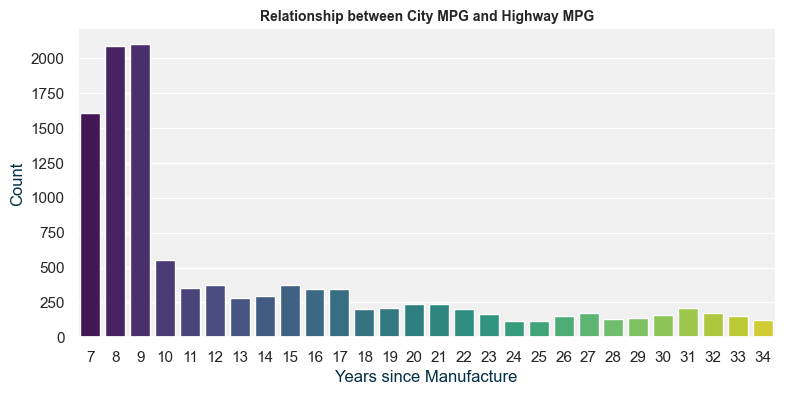

In [122]:
# Create a bar plot to visualize the distribution of 'Years since Manufacture' 

plt.figure(figsize=(9, 4))
sns.barplot(x=nw_df['Years since Manufacture'].value_counts().index, y=nw_df['Years since Manufacture'].value_counts(), palette='viridis')

plt.title('Distribution of Years since Manufacture', fontdict={'weight': 'bold', 'fontsize': 10})
plt.xlabel('Years since Manufacture', fontdict={'color': '#023047'})
plt.ylabel('Count', fontdict={'color': '#023047'})

plt.gca().set_facecolor('#f0f0f0')
sns.despine()

plt.show()

In [78]:
# Value Counts in 'Engine Fuel Type'

nw_df['Engine Fuel Type'].value_counts()

Engine Fuel Type
regular unleaded     7030
premium unleaded     3493
flex-fuel             979
diesel                153
natural gas             2
Name: count, dtype: int64

In [79]:
nw_df['Engine Fuel Type'].fillna('regular unleaded', inplace=True)

In [83]:
nw_df.isnull().sum()

Make                          0
Model                         0
Year                          0
Engine Fuel Type              0
Engine HP                     0
Engine Cylinders             20
Transmission Type             0
Driven_Wheels                 0
Number of Doors               0
Market Category            3731
Vehicle Size                  0
Vehicle Style                 0
highway MPG                   0
city mpg                      0
Popularity                    0
MSRP                          0
Years since Manufacture       0
dtype: int64

In [84]:
nw_df['Engine Cylinders'].mode()

0    4.0
Name: Engine Cylinders, dtype: float64

In [86]:
nw_df['Engine Cylinders'].fillna(4.0, inplace=True)

In [87]:
# we are dropping the 'Market Category' feature and making the inplace = True which shows that the feature is removed.

nw_df.drop(columns=['Market Category'], inplace=True)

*We once again check the missing values and see if there are any missing values in our data. We see that there are no missing values in our features. Therefore, now is the time to convert all these features into a mathematical format so that we would be able to perform the machine learning operations*

In [94]:
nw_df.isnull().sum()

Make                       0
Model                      0
Year                       0
Engine Fuel Type           0
Engine HP                  0
Engine Cylinders           0
Transmission Type          0
Driven_Wheels              0
Number of Doors            0
Vehicle Size               0
Vehicle Style              0
highway MPG                0
city mpg                   0
Popularity                 0
MSRP                       0
Years since Manufacture    0
dtype: int64

In [95]:
nw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11660 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     11660 non-null  object 
 1   Model                    11660 non-null  object 
 2   Year                     11660 non-null  int64  
 3   Engine Fuel Type         11660 non-null  object 
 4   Engine HP                11660 non-null  float64
 5   Engine Cylinders         11660 non-null  float64
 6   Transmission Type        11660 non-null  object 
 7   Driven_Wheels            11660 non-null  object 
 8   Number of Doors          11660 non-null  float64
 9   Vehicle Size             11660 non-null  object 
 10  Vehicle Style            11660 non-null  object 
 11  highway MPG              11660 non-null  int64  
 12  city mpg                 11660 non-null  int64  
 13  Popularity               11660 non-null  int64  
 14  MSRP                     11

In [96]:
# Create a copy of the DataFrame (nw_df) for further processing, and name it 'scaled_df'

scaled_df = nw_df.copy()

In [97]:
scaled_df.sample(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Years since Manufacture
3880,Cadillac,Eldorado,2000,regular unleaded,275.0,8.0,AUTOMATIC,front wheel drive,2.0,Large,Coupe,25,15,1624,2905,24


In [98]:
# Convert 'Engine HP', 'Engine Cylinders', and 'Number of Doors' columns to integer type

scaled_df['Engine HP'] = scaled_df['Engine HP'].astype(int)
scaled_df['Engine Cylinders'] = scaled_df['Engine Cylinders'].astype(int)
scaled_df['Number of Doors'] = scaled_df['Number of Doors'].astype(int)

In [99]:
scaled_df.drop(columns=['Years since Manufacture'], inplace=True)

In [101]:
scaled_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded,335,6,MANUAL,rear wheel drive,2,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded,300,6,MANUAL,rear wheel drive,2,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded,300,6,MANUAL,rear wheel drive,2,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded,230,6,MANUAL,rear wheel drive,2,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded,230,6,MANUAL,rear wheel drive,2,Compact,Convertible,28,18,3916,34500


In [102]:
# Calculate the average mileage and create a new column 'Avg Mileage' 

scaled_df['Avg Mileage'] = (scaled_df['highway MPG'] + scaled_df['city mpg']) / 2

In [103]:
# Drop the columns 'highway MPG' and 'city mpg' from the DataFrame (scaled_df)

scaled_df.drop(columns=['highway MPG', 'city mpg'], inplace=True)

In [104]:
# Save the 'scaled_df' DataFrame to a CSV file named 'Scaled_data.csv'

scaled_df.to_csv('Scaled_data.csv')

In [56]:
scaled_df = pd.read_csv('Scaled_data.csv', index_col=0)

In [57]:
# Separate the features (x) and target variable (y) from the scaled DataFrame (scaled_df)

x = scaled_df.drop(columns=['MSRP'])
y = scaled_df['MSRP']

#### **Encoding the data**


In [52]:
# Identify columns with object data type in the features (x)
cols = x.select_dtypes(include='object').columns

encoder = LabelEncoder()                # Initialize LabelEncoder

# Apply LabelEncoder to transform categorical columns in the features (x)

for col in cols:
    x[col] = encoder.fit_transform(x[col])

*In machine learning, it's crucial to encode categorical data into numerical features for mathematical/Machine Learning processing. Various encoding techniques are available for this purpose, each with its advantages.*

### **Dividing the data into training and testing set**

*To split our dataset into training and testing sets, a random division is preferred, allocating 80% of the data for training and 20% for testing. With a total of around 10,000 data points, this ratio ensures a substantial training set while maintaining a sufficiently sized testing set for evaluation. The 80:20 split is a common practice, striking a balance between a representative training sample and a robust testing set to assess model performance effectively.*

In [58]:
# Split the dataset into training and testing sets for features (x) and target variable (y)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=4)

In [267]:
print(f'Training data shape - Input - xtrain : {xtrain.shape}')
print(f'Training data shape - Output - ytrain : {ytrain.shape}')
print(f'Testing data shape - Input - xtest : {xtest.shape}')
print(f'Testing data shape - Output -ytest : {ytest.shape}')

Training data shape - Input - xtrain : (9328, 13)
Training data shape - Output - ytrain : (9328,)
Testing data shape - Input - xtest : (2332, 13)
Testing data shape - Output -ytest : (2332,)


### **Linear Regression**

*We will employ a linear regression model to predict continuous output, as it is a straightforward approach. After fitting the model with the training data, we'll assess parameters and train the model. Subsequently, we'll evaluate the model's predictions by comparing actual and predicted values, utilizing various machine learning metrics for evaluation.*

*In the same way, we would be working with a few machine learning models and get their outputs and compare the values using the metrics to see which algorithm performs the best.*

In [315]:
# Initialize and fit a Linear Regression model

lnr_model = LinearRegression()
lnr_model.fit(xtrain, ytrain)

# Make predictions on both training and testing sets

train_pred = lnr_model.predict(xtrain)
test_pred = lnr_model.predict(xtest)

In [269]:
# Evaluate the Linear Regression model on training and testing sets

mae_training = metrics.mean_absolute_error(ytrain, train_pred)
mae_testing = metrics.mean_absolute_error(ytest, test_pred)

mse_tr = metrics.mean_squared_error(ytrain, train_pred)
mse_ts = metrics.mean_squared_error(ytest, test_pred)

r2_score_tr = metrics.r2_score(ytrain, train_pred)
r2_score_ts = metrics.r2_score(ytest, test_pred)

print('Model Evaluation for Training\n')
print(f'Mean absolute Error : {mae_training}')
print(f'Mean squared Error : {mse_tr}')
print(f'R2 Score : {r2_score_tr}\n')

print('Model Evaluation for Testing\n')
print(f'Mean absolute Error : {mae_testing}')
print(f'Mean squared Error : {mse_ts}')
print(f'R2 Score : {r2_score_ts}')


Model Evaluation for Training

Mean absolute Error : 17829.783745959892
Mean squared Error : 1226730886.252398
R2 Score : 0.541366798012876

Model Evaluation for Testing

Mean absolute Error : 17760.75316431029
Mean squared Error : 1500037866.5415394
R2 Score : 0.46331605642541684


In [270]:
# Import PolynomialFeatures from sklearn.preprocessing

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)                     # Create PolynomialFeatures with degree 3

# Transform the features to polynomial features for training and testing sets

xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.transform(xtest)

# Initialize Linear Regression model and fit it to the polynomial features

model = LinearRegression()
model.fit(xtrain_poly, ytrain)

# Make predictions on both training and testing sets using the polynomial features

train_pred_p = model.predict(xtrain_poly)
test_pred_p = model.predict(xtest_poly)


In [271]:
# Evaluate the model on training and testing sets

mae_training_p = metrics.mean_absolute_error(ytrain, train_pred_p)
mae_testing_p = metrics.mean_absolute_error(ytest, test_pred_p)

mse_tr_p = metrics.mean_squared_error(ytrain, train_pred_p)
mse_ts_p = metrics.mean_squared_error(ytest, test_pred_p)

r2_score_tr_p = metrics.r2_score(ytrain, train_pred_p)
r2_score_ts_p = metrics.r2_score(ytest, test_pred_p)

print('Model Evaluation for Training\n')
print(f'Mean absolute Error : {mae_training_p}')
print(f'Mean squared Error : {mse_tr_p}')
print(f'R2 Score : {r2_score_tr_p}\n')

print('Model Evaluation for Testing\n')
print(f'Mean absolute Error : {mae_testing_p}')
print(f'Mean squared Error : {mse_ts_p}')
print(f'R2 Score : {r2_score_ts_p}')


Model Evaluation for Training

Mean absolute Error : 8693.105644403151
Mean squared Error : 318909283.2853336
R2 Score : 0.880770601461421

Model Evaluation for Testing

Mean absolute Error : 9112.830568300513
Mean squared Error : 393879176.458976
R2 Score : 0.8590778043481754


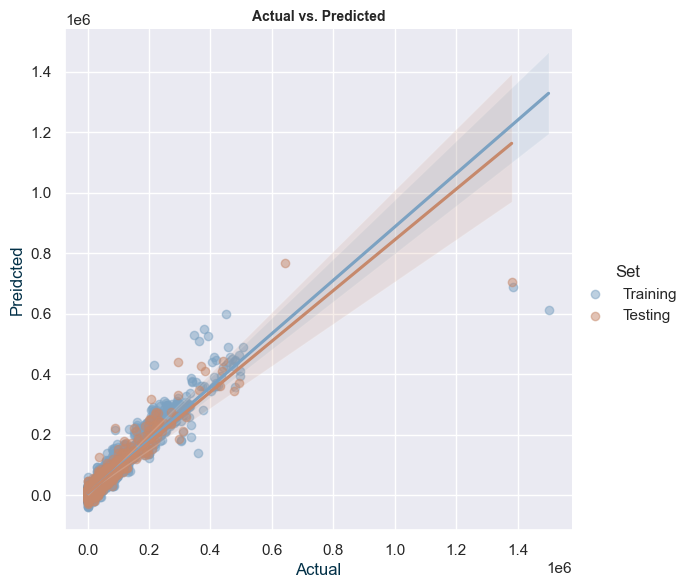

In [272]:
# Create DataFrames for actual and predicted values on training and testing sets

train_results = pd.DataFrame({'Actual': ytrain, 'Predicted': train_pred_p, 'Set': 'Training'})
test_results = pd.DataFrame({'Actual': ytest, 'Predicted': test_pred_p, 'Set': 'Testing'})
result = pd.concat([train_results, test_results])

# Plot Actual vs. Predicted values using seaborn lmplot
sns.set(style='darkgrid')
sns.lmplot(x='Actual', y='Predicted', hue='Set', data=result, scatter_kws={'alpha': 0.5}, height=6, palette='twilight_shifted')

plt.title("Actual vs. Predicted", fontdict={'weight': 'bold', 'fontsize': 10})
plt.xlabel("Actual", fontdict={'color': '#023047'})
plt.ylabel("Preidcted", fontdict={'color': '#023047'})
plt.show()

### **Decision Tree Regressor**

*We are employing a Decision Tree Regressor with random splits. After training the model using the training data, we will evaluate its performance by making predictions on the test set. This allows us to assess how well the algorithm generalizes to new, unseen data.*

In [295]:
# Initialize and fit a Decision Tree Regressor with random splits

model_dt = DecisionTreeRegressor(random_state=4)
model_dt.fit(xtrain, ytrain)

# Make predictions on both training and testing sets 

train_pred_dt = model_dt.predict(xtrain)
test_pred_dt = model_dt.predict(xtest)

In [274]:
# Evaluate the model on training and testing sets

mae_training_dt = metrics.mean_absolute_error(ytrain, train_pred_dt)
mae_testing_dt = metrics.mean_absolute_error(ytest, test_pred_dt)

mse_tr_dt = metrics.mean_squared_error(ytrain, train_pred_dt)
mse_ts_dt = metrics.mean_squared_error(ytest, test_pred_dt)

r2_score_tr_dt = metrics.r2_score(ytrain, train_pred_dt)
r2_score_ts_dt = metrics.r2_score(ytest, test_pred_dt)

print('Model Evaluation for Training\n')
print(f'Mean absolute Error : {mae_training_dt}')
print(f'Mean squared Error : {mse_tr_dt}')
print(f'R2 Score : {r2_score_tr_dt}\n')

print('Model Evaluation for Testing\n')
print(f'Mean absolute Error : {mae_testing_dt}')
print(f'Mean squared Error : {mse_ts_dt}')
print(f'R2 Score : {r2_score_ts_dt}')

Model Evaluation for Training

Mean absolute Error : 1300.4338590434486
Mean squared Error : 6595074.9278804995
R2 Score : 0.9975343244672357

Model Evaluation for Testing

Mean absolute Error : 3213.8355501999904
Mean squared Error : 67034357.10854922
R2 Score : 0.9760164300312303


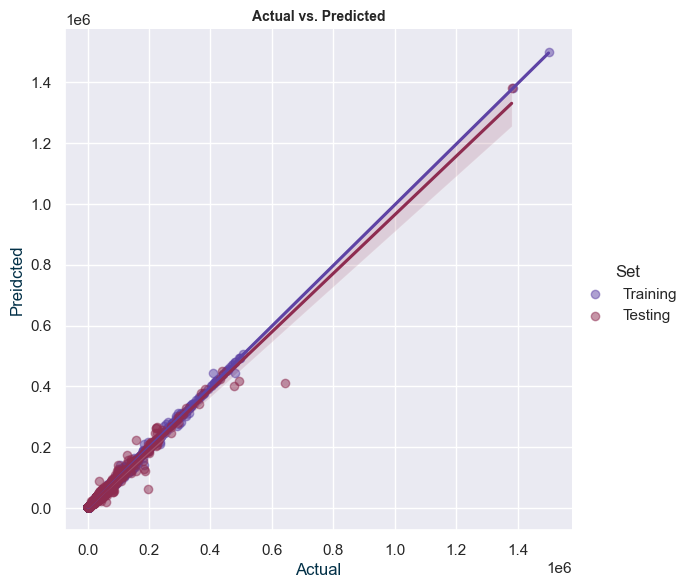

In [275]:
# Plot Actual vs. Predicted values for both training and testing sets with a 'Set' Identifier 

train_results = pd.DataFrame({'Actual': ytrain, 'Predicted': train_pred_dt, 'Set': 'Training'})
test_results = pd.DataFrame({'Actual': ytest, 'Predicted': test_pred_dt, 'Set': 'Testing'})
result = pd.concat([train_results, test_results])

sns.set(style='darkgrid')
sns.lmplot(x='Actual', y='Predicted', hue='Set', data=result, scatter_kws={'alpha': 0.5}, height=6, palette='twilight')

plt.title("Actual vs. Predicted", fontdict={'weight': 'bold', 'fontsize': 10})
plt.xlabel("Actual", fontdict={'color': '#023047'})
plt.ylabel("Preidcted", fontdict={'color': '#023047'})
plt.show()

### **RandomForest Regressor**

In [289]:
# Initialize a Random Forest Regressor model with a specified random state

model_rf = RandomForestRegressor(random_state=4)

# Define the Parameters grid to search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 5, 10, 15]
}

# create the GridSearch object
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid)

# Fit the GridSearch to the data
grid_search_rf.fit(xtrain, ytrain)

# Get the best model
best_model_rf = grid_search_rf.best_estimator_

train_pred_rf = best_model_rf.predict(xtrain)
test_pred_rf = best_model_rf.predict(xtest)

best_model_rf


RandomForestRegressor(random_state=4)

In [290]:
# Evaluate the model on training and testing sets

mae_training_rf = metrics.mean_absolute_error(ytrain, train_pred_rf)
mae_testing_rf = metrics.mean_absolute_error(ytest, test_pred_rf)

mse_tr_rf = metrics.mean_squared_error(ytrain, train_pred_rf)
mse_ts_rf = metrics.mean_squared_error(ytest, test_pred_rf)

r2_score_tr_rf = metrics.r2_score(ytrain, train_pred_rf)
r2_score_ts_rf = metrics.r2_score(ytest, test_pred_rf)

print('Model Evaluation for Training\n')
print(f'Mean absolute Error : {mae_training_rf}')
print(f'Mean squared Error : {mse_tr_rf}')
print(f'R2 Score : {r2_score_tr_rf}\n')

print('Model Evaluation for Testing\n')
print(f'Mean absolute Error : {mae_testing_rf}')
print(f'Mean squared Error : {mse_ts_rf}')
print(f'R2 Score : {r2_score_ts_rf}')

Model Evaluation for Training

Mean absolute Error : 1869.3669826383323
Mean squared Error : 44211546.57414201
R2 Score : 0.9834707975503523

Model Evaluation for Testing

Mean absolute Error : 3103.0204126678877
Mean squared Error : 93896276.21717378
R2 Score : 0.9664057655268493


### **Gradient Boosting Regressor**

In [278]:
# Initialize a GradientBoosting Regressor model with a specified random state

model_gb = GradientBoostingRegressor(random_state=4)

# Define the parameter grid for search
param_grid = {
    'n_estimators': [150, 250, 350],
    'max_depth': [2, 5, 7]
}

# Create the GridSearchCV object
grid_search_gb = GridSearchCV(estimator=model_gb, param_grid=param_grid, cv=5)

# Fit the GridSearch to the data
grid_search_gb.fit(xtrain, ytrain)

# Get the best model
best_model_gb = grid_search_gb.best_estimator_

# Make the Prediction
train_pred_gb = best_model_gb.predict(xtrain)
test_pred_gb = best_model_gb.predict(xtest)

best_model_gb


GradientBoostingRegressor(max_depth=5, n_estimators=350, random_state=4)

In [279]:
# Evaluate the model on training and testing sets

mae_training_gb = metrics.mean_absolute_error(ytrain, train_pred_gb)
mae_testing_gb = metrics.mean_absolute_error(ytest, test_pred_gb)

mse_tr_gb = metrics.mean_squared_error(ytrain, train_pred_gb)
mse_ts_gb = metrics.mean_squared_error(ytest, test_pred_gb)

r2_score_tr_gb = metrics.r2_score(ytrain, train_pred_gb)
r2_score_ts_gb = metrics.r2_score(ytest, test_pred_gb)

print('Model Evaluation for Training\n')
print(f'Mean absolute Error : {mae_training_gb}')
print(f'Mean squared Error : {mse_tr_gb}')
print(f'R2 Score : {r2_score_tr_gb}\n')

print('Model Evaluation for Testing\n')
print(f'Mean absolute Error : {mae_testing_gb}')
print(f'Mean squared Error : {mse_ts_gb}')
print(f'R2 Score : {r2_score_ts_gb}')

Model Evaluation for Training

Mean absolute Error : 2136.645408545113
Mean squared Error : 10483819.774621127
R2 Score : 0.9960804542494407

Model Evaluation for Testing

Mean absolute Error : 2825.4380162408283
Mean squared Error : 31804675.38996076
R2 Score : 0.9886209148494712


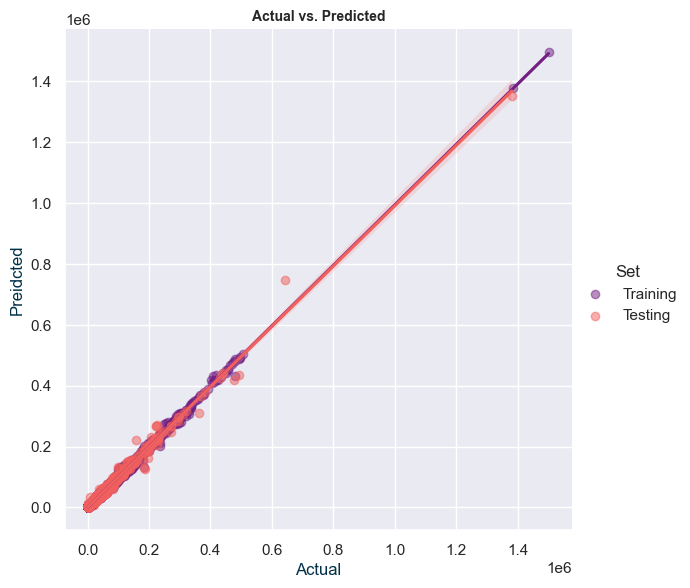

In [280]:
# Plot Actual vs. Predicted values for both training and testing sets with a 'Set' Identifier 

train_results = pd.DataFrame({'Actual': ytrain, 'Predicted': train_pred_gb, 'Set': 'Training'})
test_results = pd.DataFrame({'Actual': ytest, 'Predicted': test_pred_gb, 'Set': 'Testing'})
result = pd.concat([train_results, test_results])

sns.set(style='darkgrid')
sns.lmplot(x='Actual', y='Predicted', hue='Set', data=result, scatter_kws={'alpha': 0.5}, height=6, palette='magma')

plt.title("Actual vs. Predicted", fontdict={'weight': 'bold', 'fontsize': 10})
plt.xlabel("Actual", fontdict={'color': '#023047'})
plt.ylabel("Preidcted", fontdict={'color': '#023047'})
plt.show()

### **XGBoost Regressor**

In [284]:

model_xgb = XGBRegressor(random_state=4)

# Define the parameter grid for search
param_grid = {
    'n_estimators': [150, 250, 300],
    'max_depth': [5, 7]
}

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=5)

# Fit the GridSearch to the data
grid_search_xgb.fit(xtrain, ytrain)

# Get the best model
best_model_xgb = grid_search_xgb.best_estimator_

# Make the Prediction
train_pred_xgb = best_model_xgb.predict(xtrain)
test_pred_xgb = best_model_xgb.predict(xtest)

best_model_xgb


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=4, ...)

In [285]:
# Evaluate the model on training and testing sets

mae_training_xgb = metrics.mean_absolute_error(ytrain, train_pred_xgb)
mae_testing_xgb = metrics.mean_absolute_error(ytest, test_pred_xgb)

mse_tr_xgb = metrics.mean_squared_error(ytrain, train_pred_xgb)
mse_ts_xgb = metrics.mean_squared_error(ytest, test_pred_xgb)

r2_score_tr_xgb = metrics.r2_score(ytrain, train_pred_xgb)
r2_score_ts_xgb = metrics.r2_score(ytest, test_pred_xgb)

print('Model Evaluation for Training\n')
print(f'Mean absolute Error : {mae_training_xgb}')
print(f'Mean squared Error : {mse_tr_xgb}')
print(f'R2 Score : {r2_score_tr_xgb}\n')

print('Model Evaluation for Testing\n')
print(f'Mean absolute Error : {mae_testing_xgb}')
print(f'Mean squared Error : {mse_ts_xgb}')
print(f'R2 Score : {r2_score_ts_xgb}')

Model Evaluation for Training

Mean absolute Error : 1767.586240873124
Mean squared Error : 8092622.801773287
R2 Score : 0.9969744419500272

Model Evaluation for Testing

Mean absolute Error : 2729.6205663206647
Mean squared Error : 33541085.26496722
R2 Score : 0.9879996616663573


#### **Exploring Predictive Insights with K-Nearest Neighbors (KNN) Algorithm**

In [287]:
# Create the KNN model
model_knn = KNeighborsRegressor(n_neighbors=2)  # You can adjust the number of neighbors (k) as needed

# Define the parameter grid for search
param_grid = {
    'n_neighbors': [3, 5, 7], 
    'weights': ['uniform', 'distance'],  
    'p': [1, 2]  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
}

# Create the GridSearchCV object
grid_search_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid, cv=5)

# Fit the GridSearch to the data
grid_search_knn.fit(xtrain, ytrain)

# Get the best model
best_model_knn = grid_search_knn.best_estimator_

# Make predictions on both training and testing sets
train_pred_knn = best_model_knn.predict(xtrain)
test_pred_knn = best_model_knn.predict(xtest)


mae_training_knn = metrics.mean_absolute_error(ytrain, train_pred_knn)
mae_testing_knn = metrics.mean_absolute_error(ytest, test_pred_knn)

mse_tr_knn = metrics.mean_squared_error(ytrain, train_pred_knn)
mse_ts_knn = metrics.mean_squared_error(ytest, test_pred_knn)

r2_score_tr_knn = metrics.r2_score(ytrain, train_pred_knn)
r2_score_ts_knn = metrics.r2_score(ytest, test_pred_knn)

print('Model Evaluation for Training\n')
print(f'Mean absolute Error : {mae_training_knn}')
print(f'Mean squared Error : {mse_tr_knn}')
print(f'R2 Score : {r2_score_tr_knn}\n')

print('Model Evaluation for Testing\n')
print(f'Mean absolute Error : {mae_testing_knn}')
print(f'Mean squared Error : {mse_ts_knn}')
print(f'R2 Score : {r2_score_ts_knn}')


Model Evaluation for Training

Mean absolute Error : 1303.6025550314464
Mean squared Error : 6628519.185177602
R2 Score : 0.9975218207901992

Model Evaluation for Testing

Mean absolute Error : 3373.5004703494446
Mean squared Error : 98922289.81577106
R2 Score : 0.9646075570557701


### **DataFrame of Evaluated Machine Learning Models**

In [291]:
# Create a list of regression model names - the models which are giving the best results

models_list = ['Linear Regression', 'Polynomial Features', 'DecisionTree Regressor', 'RandomForest Regressor', 'GradientBoosting Regressor', 'XGB Regressor']

R2_Score_Training = [r2_score_tr, r2_score_tr_p, r2_score_tr_dt, r2_score_tr_rf, r2_score_tr_gb, r2_score_tr_xgb]
R2_Score_Testing = [r2_score_ts, r2_score_ts_p, r2_score_ts_dt, r2_score_ts_rf, r2_score_ts_gb, r2_score_ts_xgb]

Mae_Error_Testing = [mae_testing, mae_testing_p, mae_testing_dt, mae_testing_rf, mae_testing_gb, mae_testing_xgb]

i = 0
for i in range(len(R2_Score_Training)):
    R2_Score_Training[i] = round(R2_Score_Training[i] * 100, 2)
    R2_Score_Testing[i] = round(R2_Score_Testing[i]  * 100, 2)
    Mae_Error_Testing[i] = round(Mae_Error_Testing[i])
    i += 1 




In [292]:
result_df = pd.DataFrame({'Models': models_list, 'Training R2 Score': R2_Score_Training, 'Testing R2 Score': R2_Score_Testing, 'Mean Absolute Error': Mae_Error_Testing})
result_df.sort_values(by='Training R2 Score', ascending=False, inplace=True)

result_df

,Models,Training R2 Score,Testing R2 Score,Mean Absolute Error
2,DecisionTree Regressor,99.75,97.60,3214
5,XGB Regressor,99.70,98.80,2730
4,GradientBoosting Regressor,99.61,98.86,2825
3,RandomForest Regressor,98.35,96.64,3103
1,Polynomial Features,88.08,85.91,9113
0,Linear Regression,54.14,46.33,17761


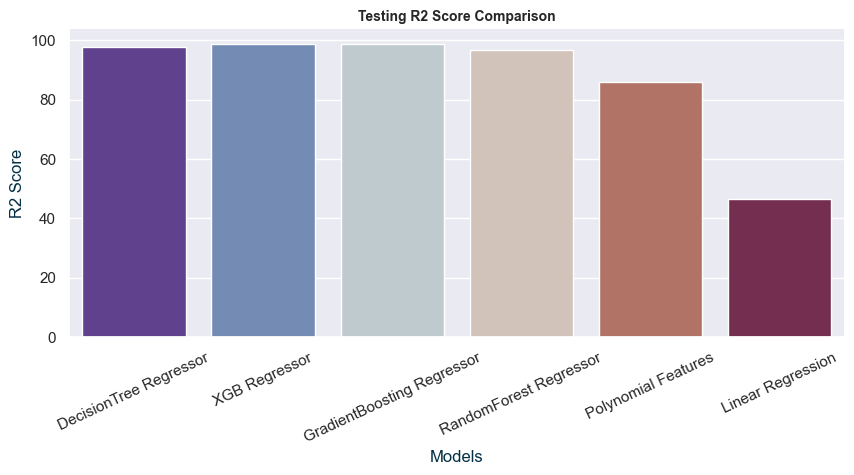

In [296]:
# Comparison of R2 Training Scores Among Machine Learning Algorithms

plt.figure(figsize=(10, 4))
sns.barplot(x='Models', y='Testing R2 Score', data=result_df, palette='twilight_shifted')

plt.title("Testing R2 Score Comparison", fontdict={'weight': 'bold', 'fontsize': 10})
plt.xlabel("Models", fontdict={'color': '#023047'})
plt.ylabel("R2 Score", fontdict={'color': '#023047'})
plt.xticks(rotation=25)
sns.despine()
plt.show()


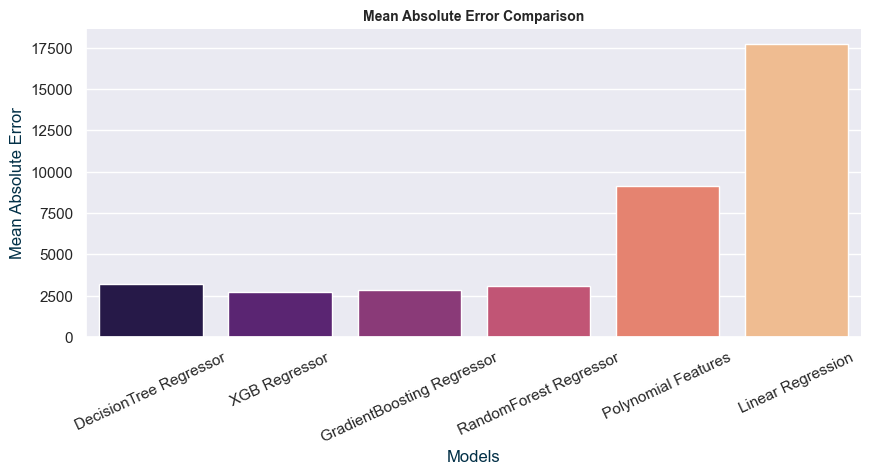

In [297]:
# Comparison of R2 Testing Scores Among Machine Learning Algorithms

plt.figure(figsize=(10, 4))
sns.barplot(x='Models', y='Mean Absolute Error', data=result_df, palette='magma')

plt.title("Mean Absolute Error Comparison", fontdict={'weight': 'bold', 'fontsize': 10})
plt.xlabel("Models", fontdict={'color': '#023047'})
plt.ylabel("Mean Absolute Error", fontdict={'color': '#023047'})
plt.xticks(rotation=25)
sns.despine()
plt.show()


### **Conclusion**

After evaluating various machine learning models, it is evident that there are variations in mean absolute error and mean squared error across different algorithms. Among these, the Gradient Boosting algorithm stands out as a top performer in terms of predictive accuracy, achieving a 99% R-squared score is indicative of an excellent fit of the model to the data. Therefore, I have decided to deploy the Gradient Boosting model, anticipating its robust performance in real-world applications.



## **Testing**

In [298]:
# Save the best Gradient Boosting model to a file using pickle

import pickle

with open('Car_Model1.pkl', 'wb') as file:
    pickle.dump(best_model_gb, file)


In [67]:
with open('Car_Model1.pkl', 'rb') as f:
    model = pickle.load(f)

In [68]:
# Concatenate features (xtest) and target variable (ytest) into a sample DataFrame

sample_df = pd.concat([xtest, ytest], axis=1)

In [74]:
sample_rec = sample_df.sample(1)
sample_rec

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,Popularity,Avg Mileage,MSRP
1780,Subaru,Baja,2004,regular unleaded,165,4,MANUAL,all wheel drive,4,Compact,Crew Cab Pickup,640,22.0,21995


In [75]:
sample_rec.drop(columns='MSRP', inplace=True)

In [76]:
for col in sample_rec.select_dtypes('object').columns:
    sample_rec[col] = encoder.fit_transform(sample_rec[col])

In [113]:
predicted_price = model.predict(sample_rec)
print(predicted_price)

[28254.59563378]


In [114]:
predicted_price = str(predicted_price).split('.')[0].replace('[', '') + ' $'

In [115]:
predicted_price

'28254 $'